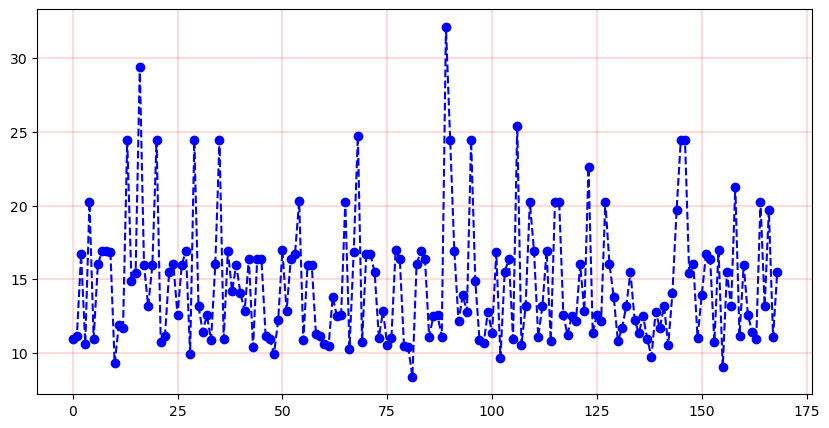

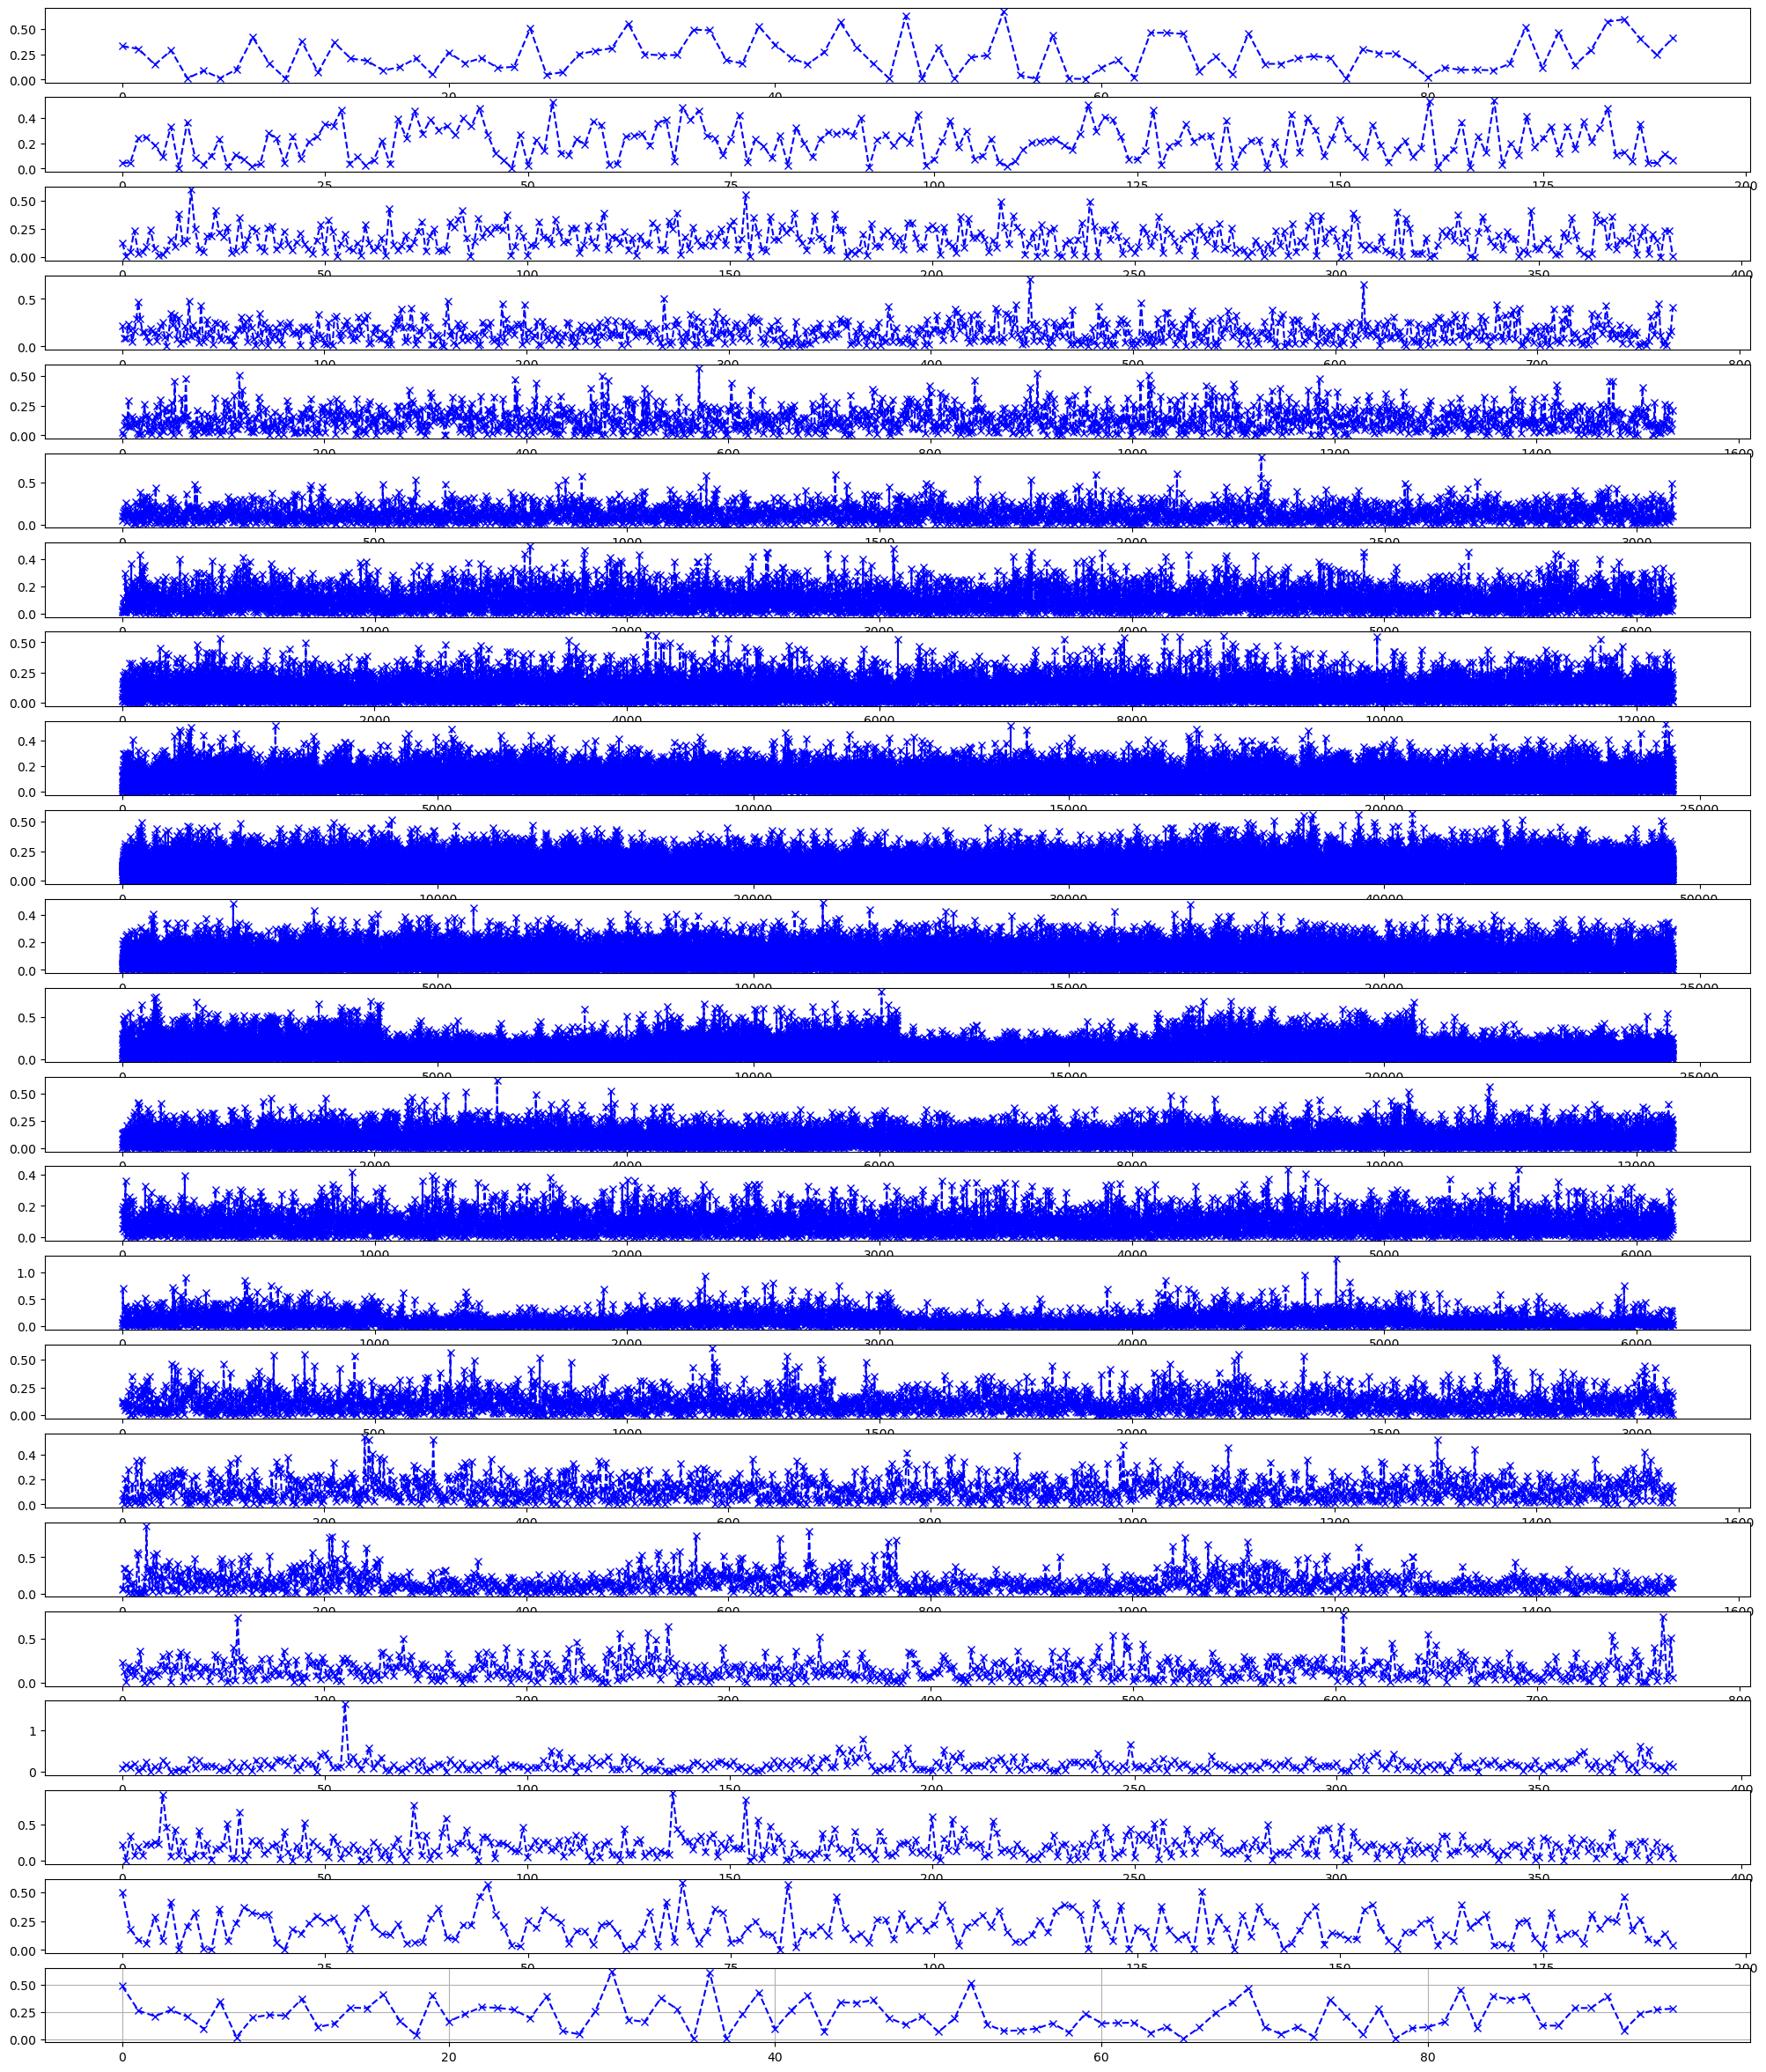

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from models import *

lista = []
for i in range(169):
    X = np.load('../../data/test_data/X_'+str(i)+'.npy')
    lista.append(np.amax(abs(X)))



fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lista, c='blue', marker='o', linestyle='dashed')   
plt.grid(color='r', linestyle='-', linewidth=0.2) 
plt.show()

model = get_model()

fig, axs = plt.subplots(23,1,figsize=(25, 30))
i=0
for layer in model.layers:    
    # Input, Maxpool and Softmax layers do not contain weights
    if 'input' in layer.name or 'maxpool' in layer.name or 'softmax' in layer.name or layer.name == 'dec_0_upsample' or layer.name == 'dec_1_upsample' or layer.name == 'dec_2_upsample' or layer.name == 'dec_3_upsample' or 'concatenate' in layer.name :
        pass
    else:
        array = np.load('../../data/weights/'+layer.name + '.npy')
        array_abs = np.abs(array)
        axs[i].plot(array_abs.flatten(), c='blue', marker='x', linestyle='dashed')
        i = i+1   
plt.grid() 
plt.show()

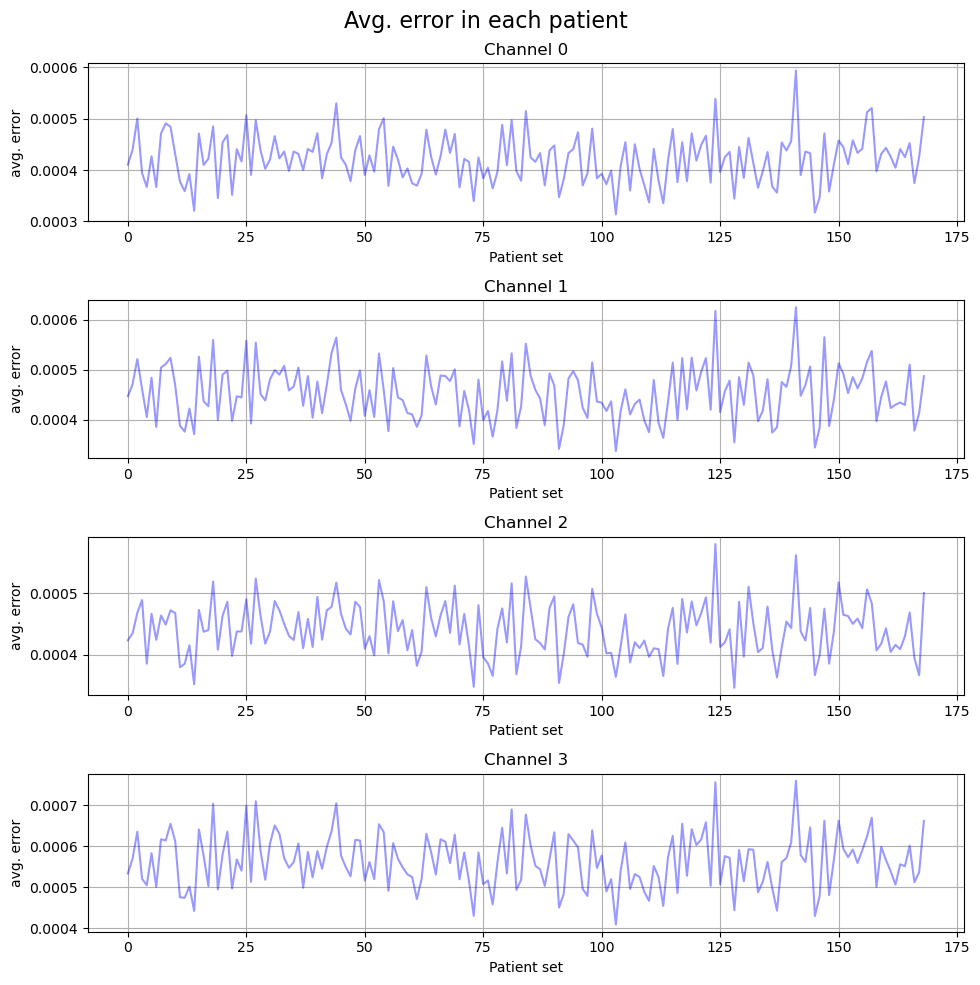

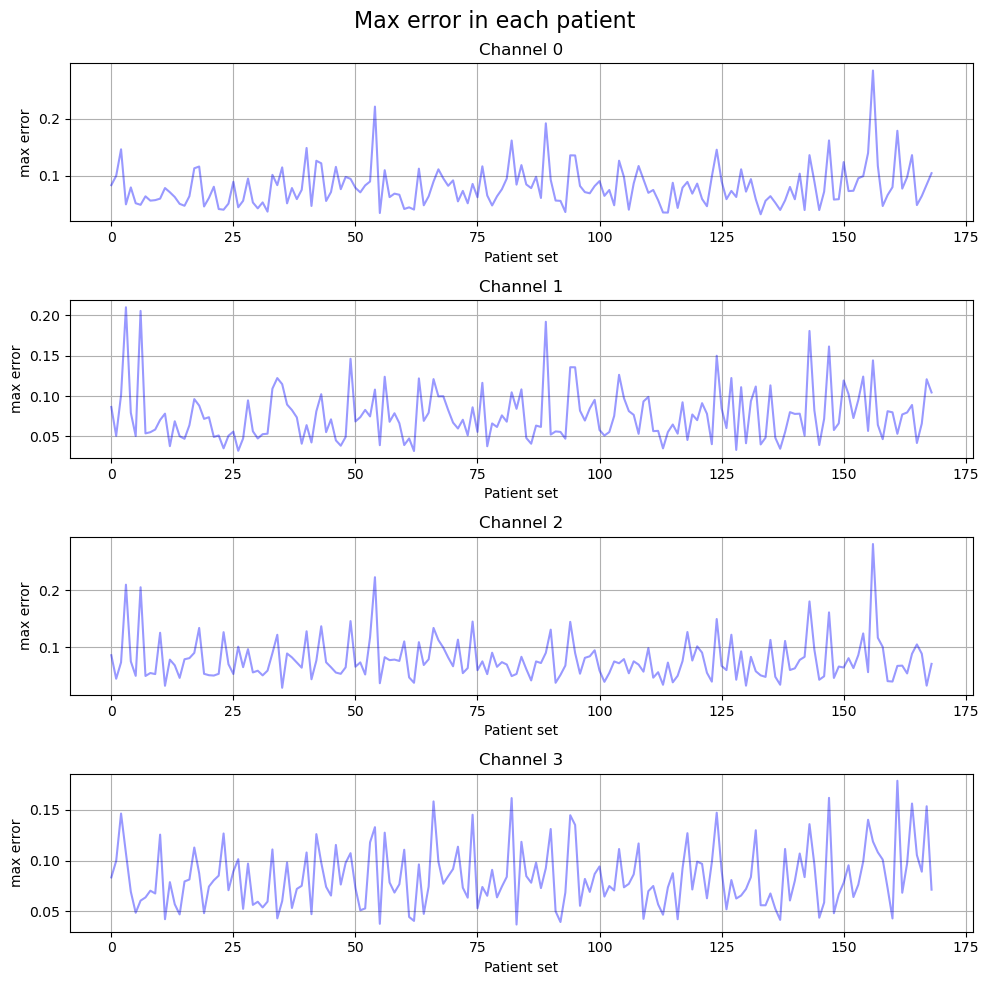

In [4]:
import matplotlib.pyplot as plt

#change with your path containing results from python and from the quantized net
fc = open("/home/domenico/Desktop/test_net_Q/output.txt","r")
fp = open("/home/domenico/Desktop/test_net_Q/python_res.txt","r")

avg_err = [[], [], [], []]
max_err = [[], [], [], []]
ch = [[], [], [], []]
for i in range(169):
    for j in range(250*64):
        c_output =  [float(n) for n in fc.readline().split()]
        python_output = [float(n) for n in fp.readline().split()]

        ch[0].append(abs(c_output[0]-python_output[0]))
        ch[1].append(abs(c_output[1]-python_output[1]))
        ch[2].append(abs(c_output[2]-python_output[2]))
        ch[3].append(abs(c_output[3]-python_output[3]))

    avg_err[0].append(sum(ch[0])/(64*250))
    avg_err[1].append(sum(ch[1])/(64*250))
    avg_err[2].append(sum(ch[2])/(64*250))
    avg_err[3].append(sum(ch[3])/(64*250))

    max_err[0].append(max(ch[0]))
    max_err[1].append(max(ch[1]))
    max_err[2].append(max(ch[2]))
    max_err[3].append(max(ch[3]))

    ch[0].clear()
    ch[1].clear()
    ch[2].clear()
    ch[3].clear()

fp.close()
fc.close()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(avg_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('avg. error')
    axs[i].grid()
fig.suptitle('Avg. error in each patient', fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(max_err[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Patient set')
    axs[i].set_ylabel('max error')
    axs[i].grid()
fig.suptitle('Max error in each patient', fontsize=16)
plt.tight_layout()
plt.show()

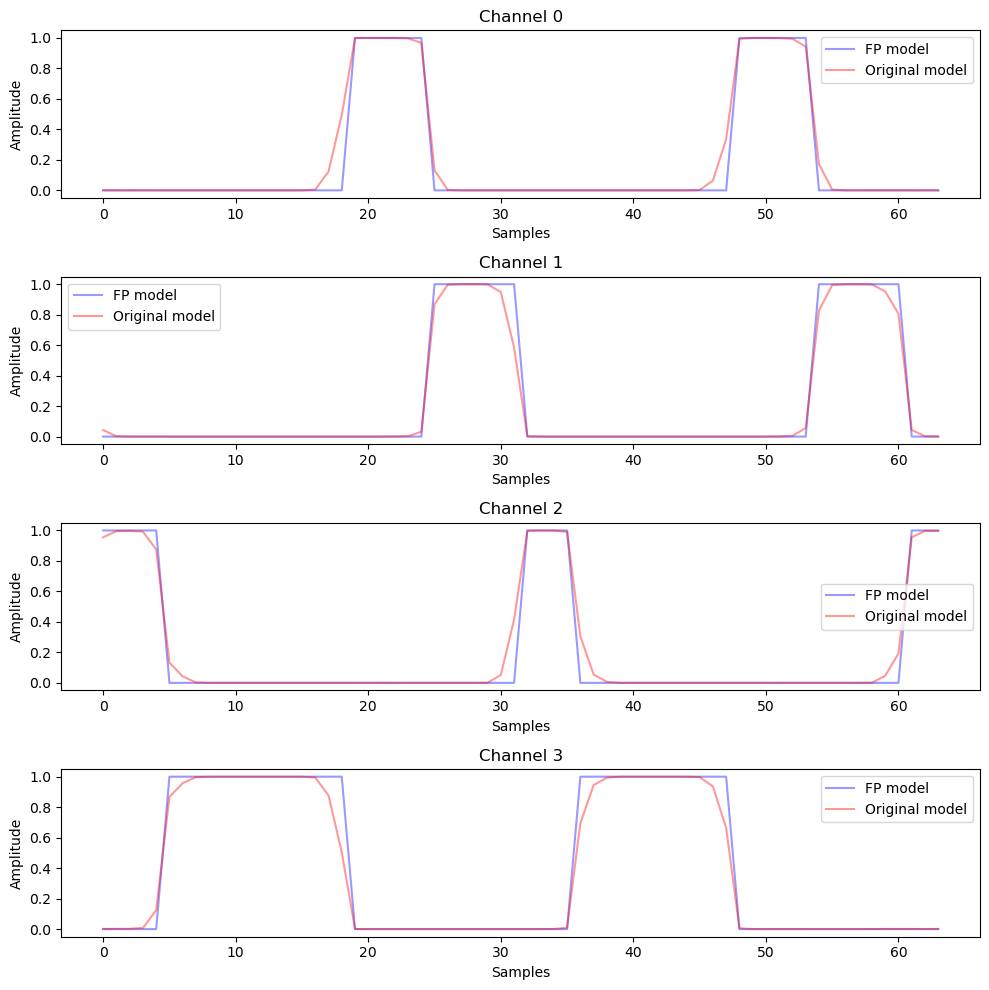

Mean Error - Channel 0: 2.26%
Mean Error - Channel 1: 1.91%
Mean Error - Channel 2: 2.35%
Mean Error - Channel 3: 2.71%


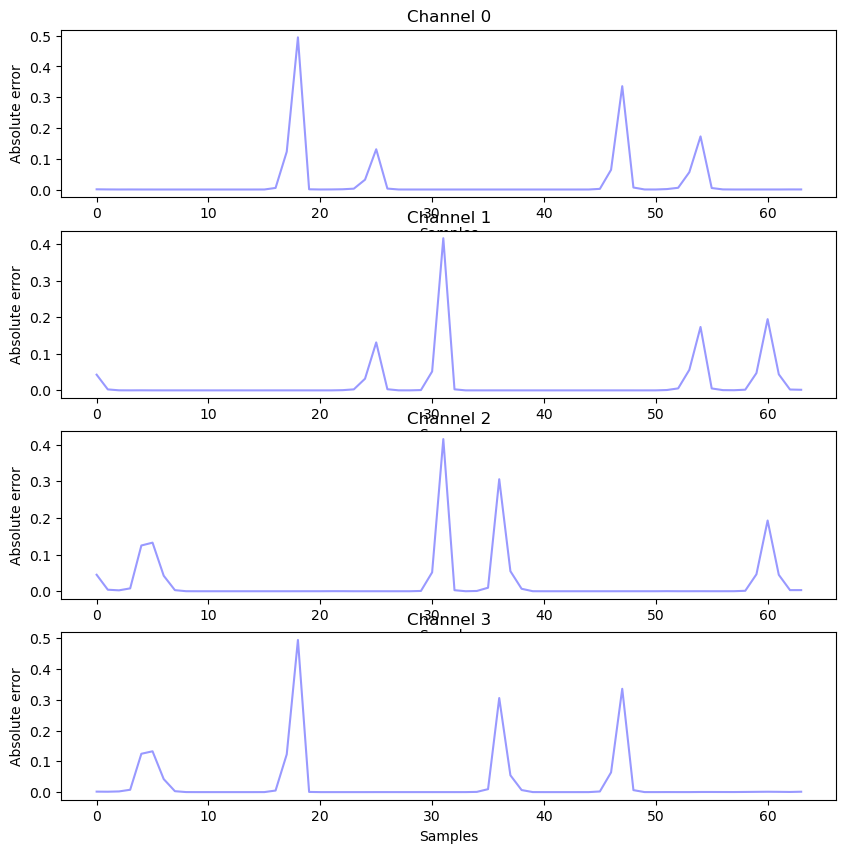

In [ ]:
import matplotlib.pyplot as plt

c_output = [[],[],[],[]]
with open('/home/domenico/Desktop/test_net_Q/output.txt') as f: #change with your path containing results from python and from the quantized net
    lines = f.readlines()
    for line in lines:
        tmp = line.split()
        c_output[0].append(float((tmp[0])))
        c_output[1].append(float((tmp[1])))
        c_output[2].append(float((tmp[2])))
        c_output[3].append(float((tmp[3])))

python_output = [[],[],[],[]]
with open('/home/domenico/Desktop/test_net_Q/python_result.txt') as f: #change with your path containing results from python and from the quantized net
    lines = f.readlines()
    for line in lines:
        tmp = line.split()
        python_output[0].append(float((tmp[0])))
        python_output[1].append(float((tmp[1])))
        python_output[2].append(float((tmp[2])))
        python_output[3].append(float((tmp[3])))

fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    axs[i].plot(c_output[i], c='blue', alpha=0.4)
    axs[i].plot(python_output[i], c='red', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Samples')
    axs[i].set_ylabel('Amplitude')
    axs[i].legend(['FP model', 'Original model'])
plt.tight_layout()
plt.show()

ch_mean_error = []
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
for i in range(4):
    ch_mean_error.append([abs(a - b) for a, b in zip(c_output[i], python_output[i])])
    axs[i].plot(ch_mean_error[i], c='blue', alpha=0.4)
    axs[i].set_title(f'Channel {i}')
    axs[i].set_xlabel('Samples')
    axs[i].set_ylabel('Absolute error')
    print('Mean Error - Channel ' + f'{i}'+f': {(sum(ch_mean_error[i])/64)*100:.2f}%')
plt.show()